In [48]:
import numpy as np
import pandas as pd
import time 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [49]:
class K_Nearest_Neighbors_Regressor:
    def __init__(self, K):
        self.K = K

    # Function to store training set
    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

        # no_of_training_examples, no_of_features
        self.m, self.n = X_train.shape

    # Function for prediction
    def predict(self, X_test):
        self.X_test = X_test

        # no_of_test_examples, no_of_features
        self.m_test, self.n = X_test.shape

        # initialize Y_predict
        Y_predict = np.zeros(self.m_test)

        for i in range(self.m_test):
            x = self.X_test[i]

            # find the K nearest neighbors from current test example
            neighbors = np.zeros(self.K)
            neighbors = self.find_neighbors(x)

            # calculate the mean of K nearest neighbors
            Y_predict[i] = np.mean(neighbors)
        return Y_predict

    # Function to find the K nearest neighbors to current test example
    def find_neighbors(self, x):
        # calculate all the euclidean distances between current test
        # example x and training set X_train
        euclidean_distances = np.zeros(self.m)

        for i in range(self.m):
            d = self.euclidean(x, self.X_train[i])
            euclidean_distances[i] = d

        # sort Y_train according to euclidean_distance_array and
        # store into Y_train_sorted
        inds = euclidean_distances.argsort()
        Y_train_sorted = self.Y_train[inds]
        
        return Y_train_sorted[: self.K]

    # Function to calculate euclidean distance
    def euclidean(self, x, x_train):
        return np.sqrt(np.sum(np.square(x - x_train)))

In [50]:
df = pd.read_csv( "../assets/salary_data.csv" ) 
X = df.iloc[:,:-1].values 
Y = df.iloc[:,1].values 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 ) 

In [51]:
# Model training 
model = K_Nearest_Neighbors_Regressor( K = 3 ) 
model.fit( X_train, Y_train ) 
model1 = KNeighborsRegressor( n_neighbors = 3 ) 
model1.fit( X_train, Y_train ) 

KNeighborsRegressor(n_neighbors=3)

In [52]:
# Prediction on test set 
Y_pred = model.predict( X_test ) 
Y_pred1 =  model1.predict( X_test ) 

In [81]:
a = np.round( Y_pred[:3], 2)  
b = np.round( Y_pred1[:3], 2) 

def get_slope_intercept(x1, y1, x2, y2):
    # Calculate the slope
    m = (y2 - y1) / (x2 - x1)
    # Calculate the intercept
    b = y1 - m * x1
    return m, b
m1, c1 = get_slope_intercept(X_test[0], a[0], X_test[1], a[1])
m2, c2 = get_slope_intercept(X_test[0], b[0], X_test[1], b[1])

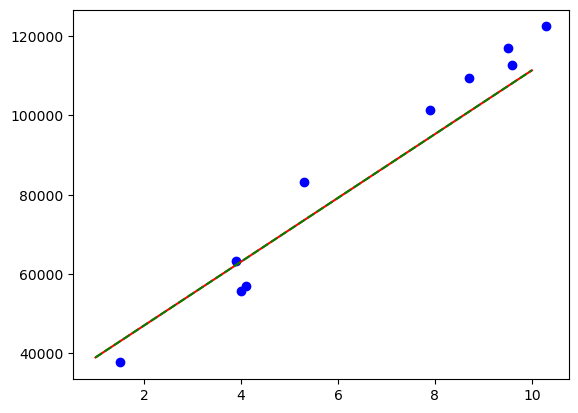

In [87]:
plt.scatter(X_test, Y_test,color = 'blue')
plt.plot(list(range(1, 11)),[(m1 * x + c1) for x in range(1,11)], color = "red")
plt.plot(list(range(1, 11)),[(m2 * x + c2) for x in range(1,11)], linestyle= "dashed", color="green")
plt.show()